<a href="https://colab.research.google.com/github/Natalkina/DataScience/blob/main/HW11_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, GRU, Dense, LSTM, Bidirectional


In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)


17464789/17464789 [==============================] - 0s 0us/step


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
input_train.shape, input_test.shape

((25000, 500), (25000, 500))

In [5]:
results = []

In [21]:
# SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)
results.append(('SimpleRNN', model.evaluate(input_test, y_test)[1]))

Epoch 1/10
625/625 [==============================] - 307s 488ms/step - loss: 0.6061 - acc: 0.6432 - val_loss: 0.4329 - val_acc: 0.8072
Epoch 2/10
625/625 [==============================] - 273s 437ms/step - loss: 0.3896 - acc: 0.8348 - val_loss: 0.4079 - val_acc: 0.8304
Epoch 3/10
625/625 [==============================] - 271s 433ms/step - loss: 0.3023 - acc: 0.8766 - val_loss: 0.5269 - val_acc: 0.7490
Epoch 4/10
625/625 [==============================] - 266s 426ms/step - loss: 0.2546 - acc: 0.8981 - val_loss: 0.4133 - val_acc: 0.8276
Epoch 5/10
625/625 [==============================] - 258s 413ms/step - loss: 0.1859 - acc: 0.9316 - val_loss: 0.4602 - val_acc: 0.8340
Epoch 6/10
625/625 [==============================] - 260s 417ms/step - loss: 0.1386 - acc: 0.9498 - val_loss: 0.5010 - val_acc: 0.8154
Epoch 7/10
625/625 [==============================] - 263s 421ms/step - loss: 0.1025 - acc: 0.9644 - val_loss: 0.5516 - val_acc: 0.8144
Epoch 8/10
625/625 [============================

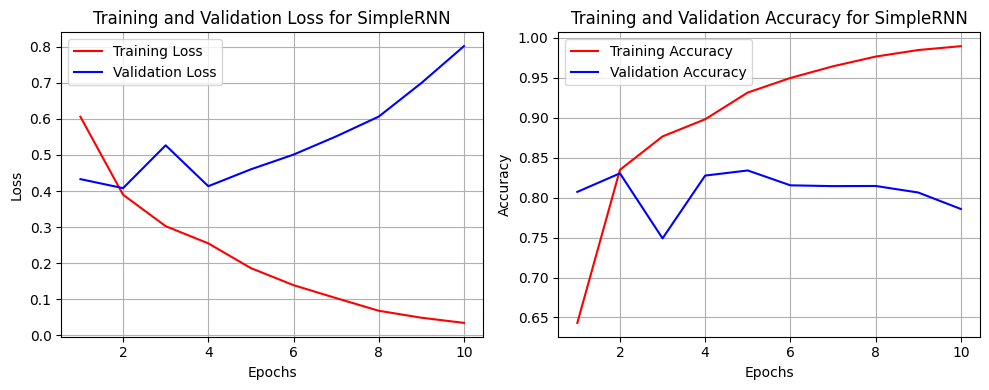

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(loss) + 1)
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for SimpleRNN')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for SimpleRNN')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)
results.append(('LSTM', model.evaluate(input_test, y_test)[1]))

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 0.4595 - acc: 0.7780 - val_loss: 0.3571 - val_acc: 0.8548
Epoch 2/10
625/625 [==============================] - 39s 62ms/step - loss: 0.2823 - acc: 0.8900 - val_loss: 0.2900 - val_acc: 0.8800
Epoch 3/10
625/625 [==============================] - 29s 47ms/step - loss: 0.2374 - acc: 0.9117 - val_loss: 0.2872 - val_acc: 0.8886
Epoch 4/10
625/625 [==============================] - 28s 44ms/step - loss: 0.2078 - acc: 0.9244 - val_loss: 0.2975 - val_acc: 0.8782
Epoch 5/10
625/625 [==============================] - 17s 27ms/step - loss: 0.1866 - acc: 0.9334 - val_loss: 0.3074 - val_acc: 0.8842
Epoch 6/10
625/625 [==============================] - 15s 23ms/step - loss: 0.1667 - acc: 0.9419 - val_loss: 0.2999 - val_acc: 0.8756
Epoch 7/10
625/625 [==============================] - 15s 25ms/step - loss: 0.1502 - acc: 0.9467 - val_loss: 0.3350 - val_acc: 0.8856
Epoch 8/10
625/625 [==============================] - 17s 27m

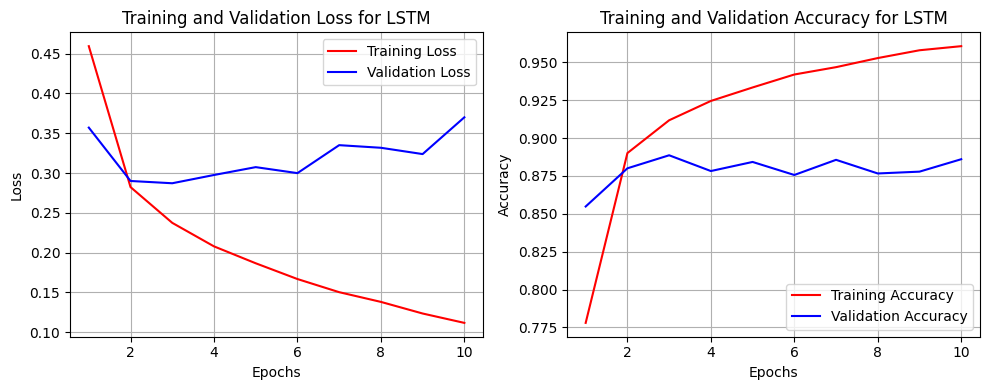

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(loss) + 1)
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

plt.figure(figsize=(10, 4))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for LSTM')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for LSTM')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# GRU
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)
results.append(('GRU', model.evaluate(input_test, y_test)[1]))

Epoch 1/10
625/625 [==============================] - 61s 93ms/step - loss: 0.4783 - acc: 0.7535 - val_loss: 0.3356 - val_acc: 0.8576
Epoch 2/10
625/625 [==============================] - 28s 45ms/step - loss: 0.2940 - acc: 0.8815 - val_loss: 0.3210 - val_acc: 0.8788
Epoch 3/10
625/625 [==============================] - 21s 34ms/step - loss: 0.2345 - acc: 0.9112 - val_loss: 0.2985 - val_acc: 0.8900
Epoch 4/10
625/625 [==============================] - 16s 26ms/step - loss: 0.2025 - acc: 0.9243 - val_loss: 0.2784 - val_acc: 0.8926
Epoch 5/10
625/625 [==============================] - 16s 25ms/step - loss: 0.1759 - acc: 0.9349 - val_loss: 0.3236 - val_acc: 0.8880
Epoch 6/10
625/625 [==============================] - 17s 26ms/step - loss: 0.1546 - acc: 0.9441 - val_loss: 0.2793 - val_acc: 0.8934
Epoch 7/10
625/625 [==============================] - 14s 23ms/step - loss: 0.1359 - acc: 0.9526 - val_loss: 0.2805 - val_acc: 0.8926
Epoch 8/10
625/625 [==============================] - 14s 22ms

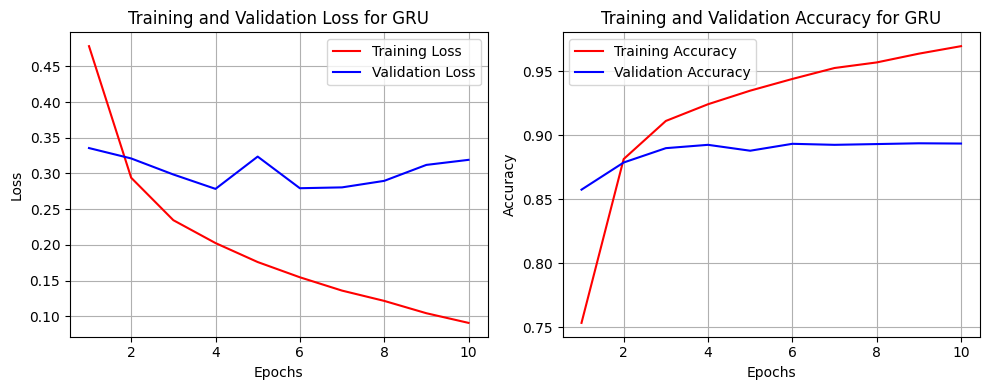

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(loss) + 1)
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for GRU')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for GRU')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
# Bidirectional LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)
results.append(('Bidirectional LSTM', model.evaluate(input_test, y_test)[1]))

Epoch 1/10
625/625 [==============================] - 74s 113ms/step - loss: 0.4854 - acc: 0.7502 - val_loss: 0.4613 - val_acc: 0.8304
Epoch 2/10
625/625 [==============================] - 38s 61ms/step - loss: 0.2940 - acc: 0.8856 - val_loss: 0.3801 - val_acc: 0.8450
Epoch 3/10
625/625 [==============================] - 29s 46ms/step - loss: 0.2375 - acc: 0.9092 - val_loss: 0.2967 - val_acc: 0.8756
Epoch 4/10
625/625 [==============================] - 26s 41ms/step - loss: 0.2082 - acc: 0.9220 - val_loss: 0.3299 - val_acc: 0.8712
Epoch 5/10
625/625 [==============================] - 25s 40ms/step - loss: 0.1941 - acc: 0.9314 - val_loss: 0.3028 - val_acc: 0.8714
Epoch 6/10
625/625 [==============================] - 26s 41ms/step - loss: 0.1706 - acc: 0.9408 - val_loss: 0.3116 - val_acc: 0.8838
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 0.1548 - acc: 0.9454 - val_loss: 0.3285 - val_acc: 0.8716
Epoch 8/10
625/625 [==============================] - 24s 39m

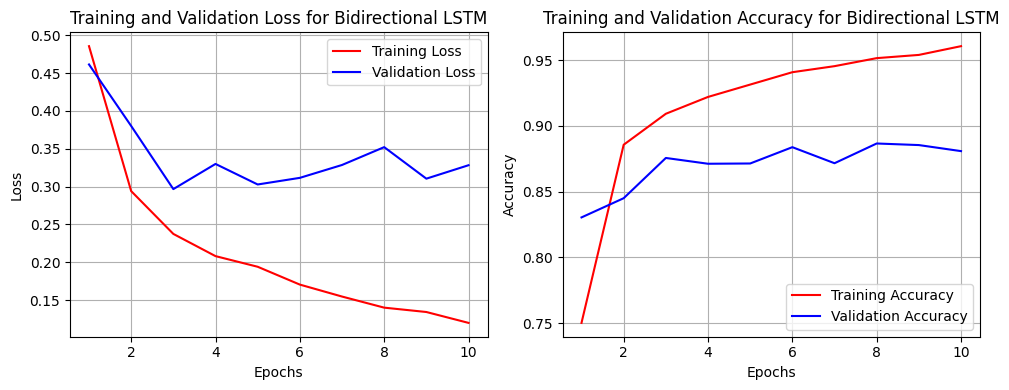

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(loss) + 1)
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for Bidirectional LSTM')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Bidirectional LSTM')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
for model_name, acc in results:
    print(f'{model_name} має точність {acc * 100:.2f}%')

SimpleRNN має точність 78.84%
LSTM має точність 87.44%
GRU має точність 88.32%
Bidirectional LSTM має точність 87.20%
